In [1]:
%pip install matplotlib
%pip install missingno
%pip install plotly
import pandas as pd
import scipy as sp
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
all_disasters = pd.read_csv('Disaster prediction/1900_2021_DISASTERS.xlsx - emdat data.csv')
disaster_types = all_disasters['Disaster Type'].unique()
dis = pd.DataFrame()
for type in disaster_types:
    filter_rows = all_disasters[all_disasters['Disaster Type'] == type]
    dis = pd.concat([dis, pd.DataFrame(filter_rows)], ignore_index=True)
dis.reset_index(inplace=True, drop=True)
dis = dis[['Year', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Country', 'Region', 'Continent', 'Location']]
dis

,Year,Disaster Group,Disaster Subgroup,Disaster Type,Country,Region,Continent,Location
0,1900,Natural,Climatological,Drought,Cabo Verde,Western Africa,Africa,Countrywide
1,1900,Natural,Climatological,Drought,India,Southern Asia,Asia,Bengal
2,1910,Natural,Climatological,Drought,Burkina Faso,Western Africa,Africa,NaN
3,1910,Natural,Climatological,Drought,Cabo Verde,Western Africa,Africa,NaN
4,1910,Natural,Climatological,Drought,Gambia (the),Western Africa,Africa,NaN
...,...,...,...,...,...,...,...,...
16121,2019,Natural,Biological,Insect infestation,Uganda,Eastern Africa,Africa,NaN
16122,2013,Natural,Extra-terrestrial,Impact,Russian Federation (the),Eastern Europe,Europe,Chelyabinsk (Ural Region)
16123,2014,Natural,Biological,Animal accident,Niger (the),Western Africa,Africa,Near Niamey
16124,2021,Natural,Climatological,Glacial lake outburst,India,Southern Asia,Asia,Chamoli District (Uttarakhand State)


In [3]:
dis = dis[~dis['Disaster Subgroup'].isin(['Meteorological', 'Extra-terrestrial', 'Biological'])]
dis

,Year,Disaster Group,Disaster Subgroup,Disaster Type,Country,Region,Continent,Location
0,1900,Natural,Climatological,Drought,Cabo Verde,Western Africa,Africa,Countrywide
1,1900,Natural,Climatological,Drought,India,Southern Asia,Asia,Bengal
2,1910,Natural,Climatological,Drought,Burkina Faso,Western Africa,Africa,NaN
3,1910,Natural,Climatological,Drought,Cabo Verde,Western Africa,Africa,NaN
4,1910,Natural,Climatological,Drought,Gambia (the),Western Africa,Africa,NaN
...,...,...,...,...,...,...,...,...
15419,2021,Natural,Climatological,Wildfire,United States of America (the),Northern America,Americas,El Dorado County (California)
15420,2021,Natural,Climatological,Wildfire,United States of America (the),Northern America,Americas,"Pinas and Gila counties (Arizona); Montana, Utah"
15421,2021,Natural,Climatological,Wildfire,United States of America (the),Northern America,Americas,"Arizona, California, Oregon"
16124,2021,Natural,Climatological,Glacial lake outburst,India,Southern Asia,Asia,Chamoli District (Uttarakhand State)


In [4]:
plt_x = dis['Year'].unique()
plt_y = dis.groupby(['Year', 'Disaster Type']).size().unstack()
px.line(data_frame=plt_y, x=plt_y.index, y=plt_y.columns.values)

In [5]:
plt_y = dis.groupby(['Country', 'Disaster Type']).size().unstack()
px.bar(data_frame=plt_y, x=plt_y.index, y=plt_y.columns.values)

In [6]:
plt_y.fillna(0)

Disaster Type,Drought,Earthquake,Flood,Glacial lake outburst,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Country,,,,,,,,
Afghanistan,8.0,33.0,98.0,0.0,28.0,0.0,0.0,1.0
Albania,1.0,16.0,16.0,0.0,1.0,0.0,0.0,1.0
Algeria,1.0,21.0,52.0,0.0,1.0,0.0,0.0,3.0
American Samoa,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Angola,8.0,0.0,45.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
Yemen Arab Rep,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0
Yemen P Dem Rep,2.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
Yugoslavia,1.0,11.0,6.0,0.0,0.0,0.0,0.0,2.0


In [7]:
plt_y = dis.groupby(['Region', 'Disaster Type']).size().unstack()
px.bar(data_frame=plt_y, x=plt_y.index, y=plt_y.columns.values)

In [8]:
flood_data = dis.loc[dis['Disaster Type'] == 'Flood']
flood_data = flood_data.groupby(['Country', 'Year']).size().unstack()
flood_data.fillna(0, inplace=True)
flood_data.reset_index(inplace=True)
for i in flood_data.iloc[:, flood_data.columns.get_loc(1900):flood_data.columns.get_loc(2020)]:
    flood_data[i] = flood_data[i].astype(int)
x = flood_data.iloc[:, flood_data.columns.get_loc(1900):flood_data.columns.get_loc(2020)]
y = flood_data[2020]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape

(152, 96)

In [9]:
%pip install keras
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip




[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
%pip install tensorflow==2.2.1
from keras.models import Sequential
from keras.layers import Dense

ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.1 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2)
ERROR: No matching distribution found for tensorflow==2.2.1

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [11]:
rainfall = pd.read_csv('Disaster prediction/district wise rainfall normal.csv')

In [12]:
px.bar(data_frame=rainfall, x='STATE_UT_NAME', y="ANNUAL", color='DISTRICT')

In [13]:
rainfall_norm_kerala = rainfall.loc[rainfall['STATE_UT_NAME'] == 'KERALA']

In [14]:
rainfall_norm_kerala.isna().mean()

STATE_UT_NAME    0.0
DISTRICT         0.0
JAN              0.0
FEB              0.0
MAR              0.0
APR              0.0
MAY              0.0
JUN              0.0
JUL              0.0
AUG              0.0
SEP              0.0
OCT              0.0
NOV              0.0
DEC              0.0
ANNUAL           0.0
Jan-Feb          0.0
Mar-May          0.0
Jun-Sep          0.0
Oct-Dec          0.0
dtype: float64

In [15]:
rainfall_norm_kerala

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
626,KERALA,ALAPPUZHA,17.5,27.9,45.1,134.0,298.7,593.0,533.0,343.1,276.8,332.9,187.6,51.6,2841.2,45.4,477.8,1745.9,572.1
627,KERALA,CANNUR,2.5,2.0,7.6,57.9,235.0,852.4,1055.0,540.9,220.7,229.4,91.6,24.1,3319.1,4.5,300.5,2669.0,345.1
628,KERALA,ERNAKULAM,13.2,18.8,31.2,112.0,300.4,696.4,670.2,401.3,297.1,299.9,145.0,44.4,3029.9,32.0,443.6,2065.0,489.3
629,KERALA,KOTTAYAM,13.0,24.9,42.3,136.1,281.8,649.1,591.4,386.0,270.8,316.6,177.4,41.1,2930.5,37.9,460.2,1897.3,535.1
630,KERALA,KOZHIKODE,2.3,3.9,15.1,80.9,256.6,895.8,955.2,500.9,251.2,262.1,130.1,30.0,3384.1,6.2,352.6,2603.1,422.2
631,KERALA,MALAPPURAM,1.7,3.9,12.7,86.8,221.3,660.9,792.9,395.3,211.3,290.4,135.1,22.8,2835.1,5.6,320.8,2060.4,448.3
632,KERALA,PALAKKAD,2.9,6.5,22.5,98.7,158.7,464.3,595.4,333.8,179.2,263.8,138.6,25.6,2290.0,9.4,279.9,1572.7,428.0
633,KERALA,KOLLAM,17.5,33.7,62.6,158.5,248.5,457.7,398.0,258.7,217.9,362.7,221.4,54.5,2491.7,51.2,469.6,1332.3,638.6
634,KERALA,THRISSUR,3.4,7.5,17.0,79.2,289.1,707.4,772.9,440.1,277.1,296.3,138.1,35.0,3063.1,10.9,385.3,2197.5,469.4
635,KERALA,THIRUVANANTHA,19.3,21.1,35.5,116.7,216.6,338.7,228.9,142.0,161.7,268.0,192.0,62.7,1803.2,40.4,368.8,871.3,522.7


In [16]:
px.bar(data_frame=rainfall_norm_kerala, x='DISTRICT', y='ANNUAL')

In [17]:
kerala_flood = pd.read_csv('Disaster prediction/kerala.csv')
kerala_flood

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [18]:
kerala_flood.isna().mean()

SUBDIVISION         0.0
YEAR                0.0
JAN                 0.0
FEB                 0.0
MAR                 0.0
APR                 0.0
MAY                 0.0
JUN                 0.0
JUL                 0.0
AUG                 0.0
SEP                 0.0
OCT                 0.0
NOV                 0.0
DEC                 0.0
 ANNUAL RAINFALL    0.0
FLOODS              0.0
dtype: float64

In [19]:
kerala_flood['FLOODS'].replace(['YES', 'NO'], [1,0], inplace=True)

In [20]:
px.bar(data_frame=kerala_flood, x='YEAR', y=' ANNUAL RAINFALL', color='FLOODS')

In [21]:
kerala_floodT = kerala_flood.T
# kerala_flood.columns = range(kerala_flood.shape[1])
kerala_floodT = pd.DataFrame(kerala_floodT)
kerala_floodT.to_csv('kerala_floodT.csv', header=False,)
kerala_floodT = pd.read_csv('kerala_floodT.csv', skiprows=1)

In [22]:
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [23]:
x = kerala_flood.iloc[:, 1: 14]
y = kerala_flood.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [24]:
minmax = MinMaxScaler()
x_train_n = minmax.fit_transform(x_train)
x_test_n = minmax.transform(x_test)

In [25]:
x_train_n.shape

(94, 13)

In [26]:
classifier = LogisticRegression(random_state=0)

In [27]:
classifier.fit(x_train_n, y_train)

LogisticRegression(random_state=0)

In [28]:
y_pred = classifier.predict(x_test_n)

In [29]:
y_test, y_pred

(74     1
 112    1
 106    1
 23     1
 42     1
 68     0
 80     1
 73     0
 103    0
 22     1
 71     0
 35     1
 37     0
 94     0
 56     1
 0      1
 30     1
 85     0
 100    0
 109    1
 113    1
 43     0
 90     1
 16     0
 Name: FLOODS, dtype: int64,
 array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 1], dtype=int64))

In [30]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train_n,y_train)
y_predict = clf.predict(x_test_n)

In [31]:
y_test, y_predict

(74     1
 112    1
 106    1
 23     1
 42     1
 68     0
 80     1
 73     0
 103    0
 22     1
 71     0
 35     1
 37     0
 94     0
 56     1
 0      1
 30     1
 85     0
 100    0
 109    1
 113    1
 43     0
 90     1
 16     0
 Name: FLOODS, dtype: int64,
 array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 1], dtype=int64))

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
accuracy_score(y_test, y_predict)*100

75.0

In [34]:
accuracy_score(y_test, y_pred)*100


87.5

In [35]:
import seaborn as sns

<Axes: >

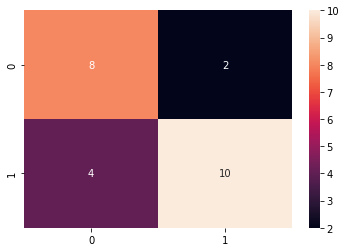

In [36]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)

<Axes: >

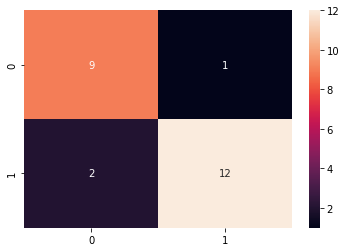

In [37]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [38]:
y_p=classifier.predict([['2015', 28.3, 447.7, 51.67, 100, 120.7, 1000, 1000.0, 357.5, 197.7, 266.9, 350.8, 48.4]])

c:\Users\pakhi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:557: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



In [39]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
kozhikode = pd.read_csv('Disaster prediction/Kozhikode_weather.csv')
kozhikode.isna().mean()

name                0.000000
datetime            0.000000
tempmax             0.000000
tempmin             0.000000
temp                0.000000
feelslikemax        0.000000
feelslikemin        0.000000
feelslike           0.000000
dew                 0.000000
humidity            0.000000
precip              0.000000
precipprob          0.000000
precipcover         0.000000
preciptype          0.250125
snow                0.000000
snowdepth           0.000000
windgust            0.716358
windspeed           0.000000
winddir             0.000000
sealevelpressure    0.000500
cloudcover          0.000000
visibility          0.000000
solarradiation      0.000000
solarenergy         0.000000
uvindex             0.000000
severerisk          0.731366
sunrise             0.000000
sunset              0.000000
moonphase           0.000000
conditions          0.000000
description         0.000000
icon                0.000000
stations            0.000000
dtype: float64

In [41]:
kozhikode.columns.unique()

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [42]:
kozhikode_filter = kozhikode[['datetime', 'tempmax', 'tempmin', 'temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility']]

In [43]:
kozhikode_filter.isna().mean()
kozhikode_filter['sealevelpressure'].interpolate(limit_direction='both', inplace=True)

C:\Users\pakhi\AppData\Local\Temp/ipykernel_2928/677679435.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
kozhikode_filter.isna().mean()

datetime            0.0
tempmax             0.0
tempmin             0.0
temp                0.0
feelslike           0.0
dew                 0.0
humidity            0.0
precip              0.0
precipprob          0.0
windspeed           0.0
winddir             0.0
sealevelpressure    0.0
cloudcover          0.0
visibility          0.0
dtype: float64

In [45]:
kozhikode_filter

,datetime,tempmax,tempmin,temp,feelslike,dew,humidity,precip,precipprob,windspeed,winddir,sealevelpressure,cloudcover,visibility
0,2018-01-09,32.1,21.0,26.1,26.9,19.3,67.3,0.0,0,13.0,63.3,1011.9,10.6,5.8
1,2018-01-10,33.0,24.0,27.8,29.0,20.6,65.9,0.3,100,13.0,106.2,1012.0,34.9,6.4
2,2018-01-11,33.0,22.4,27.3,29.2,21.5,71.9,0.4,100,13.0,308.1,1012.5,27.6,6.3
3,2018-01-12,33.0,24.0,28.1,30.6,22.7,73.6,0.0,0,11.2,288.6,1011.9,36.7,5.5
4,2018-01-13,33.0,24.0,28.2,31.1,23.1,75.0,0.0,0,10.3,289.9,1011.1,42.3,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,2023-06-26,30.1,22.0,25.3,26.3,22.4,84.9,18.0,100,18.4,283.9,1009.3,86.0,5.0
1995,2023-06-27,27.0,22.0,23.7,23.9,22.8,94.9,41.0,100,22.3,199.1,1010.0,88.9,3.8
1996,2023-06-28,28.6,22.0,25.0,25.8,23.2,90.1,4.0,100,18.4,272.3,1010.2,82.8,5.7
1997,2023-06-29,28.0,22.0,24.8,25.0,22.0,85.4,8.9,100,27.7,237.8,1011.1,90.8,4.7


In [46]:
px.bar(data_frame=kozhikode_filter, x='datetime', y='precip', color='humidity')

In [47]:
px.bar(data_frame=kozhikode_filter, x='datetime', y='precip', color='cloudcover')

In [48]:
kozhikode_filter['datetime'] = pd.to_datetime(kozhikode_filter['datetime'])
corr = kozhikode_filter.corr()
corr

C:\Users\pakhi\AppData\Local\Temp/ipykernel_2928/782759693.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,datetime,tempmax,tempmin,temp,feelslike,dew,humidity,precip,precipprob,windspeed,winddir,sealevelpressure,cloudcover,visibility
datetime,1.000000,-0.003579,-0.234846,-0.179185,-0.194581,-0.179110,0.027524,-0.029473,0.057231,-0.026175,-0.049561,-0.080874,0.107501,-0.049310
tempmax,-0.003579,1.000000,0.347733,0.843990,0.757951,-0.014778,-0.801214,-0.540946,-0.322627,-0.051063,0.029015,0.317950,-0.673157,0.634327
tempmin,-0.234846,0.347733,1.000000,0.707701,0.776281,0.728636,-0.074905,-0.130287,0.289263,0.167313,0.282340,-0.227387,0.027256,0.335920
temp,-0.179185,0.843990,0.707701,1.000000,0.970816,0.347409,-0.654493,-0.448614,-0.124470,0.023068,0.179362,0.111335,-0.512191,0.636106
feelslike,-0.194581,0.757951,0.776281,0.970816,1.000000,0.512400,-0.497517,-0.384772,0.012589,0.073780,0.211259,-0.007963,-0.365211,0.592376
dew,-0.179110,-0.014778,0.728636,0.347409,0.512400,1.000000,0.478164,0.123622,0.573411,0.189325,0.254494,-0.459827,0.426825,0.047392
humidity,0.027524,-0.801214,-0.074905,-0.654493,-0.497517,0.478164,1.000000,0.536942,0.573535,0.137800,0.036224,-0.479175,0.820321,-0.568540
precip,-0.029473,-0.540946,-0.130287,-0.448614,-0.384772,0.123622,0.536942,1.000000,0.261067,0.109506,-0.023667,-0.299778,0.477745,-0.512353
precipprob,0.057231,-0.322627,0.289263,-0.124470,0.012589,0.573411,0.573535,0.261067,1.000000,0.150169,0.138454,-0.440190,0.647544,-0.132161
windspeed,-0.026175,-0.051063,0.167313,0.023068,0.073780,0.189325,0.137800,0.109506,0.150169,1.000000,0.304977,-0.191892,0.122330,0.090284


In [49]:
px.imshow(corr, text_auto=True, aspect='auto')

In [50]:
spear_corr = kozhikode_filter.corr(method='spearman')
spear_corr

,datetime,tempmax,tempmin,temp,feelslike,dew,humidity,precip,precipprob,windspeed,winddir,sealevelpressure,cloudcover,visibility
datetime,1.000000,0.004863,-0.250291,-0.180185,-0.198367,-0.202969,0.027580,-0.016752,0.057231,-0.048463,-0.122370,-0.087432,0.099408,-0.095844
tempmax,0.004863,1.000000,0.362600,0.843451,0.757977,0.005578,-0.799935,-0.572561,-0.326176,-0.006824,0.035953,0.301009,-0.673063,0.588216
tempmin,-0.250291,0.362600,1.000000,0.699613,0.760260,0.723515,-0.084480,0.063337,0.281244,0.198437,0.187538,-0.208556,-0.001583,0.369451
temp,-0.180185,0.843451,0.699613,1.000000,0.972853,0.359358,-0.642074,-0.393473,-0.124596,0.044227,0.130808,0.110023,-0.511101,0.628669
feelslike,-0.198367,0.757977,0.760260,0.972853,1.000000,0.520771,-0.489005,-0.267540,0.008918,0.081173,0.142329,0.012432,-0.378820,0.597945
dew,-0.202969,0.005578,0.723515,0.359358,0.520771,1.000000,0.413650,0.431658,0.525653,0.222168,0.109082,-0.438532,0.361484,0.100044
humidity,0.027580,-0.799935,-0.084480,-0.642074,-0.489005,0.413650,1.000000,0.763929,0.587006,0.150976,-0.007348,-0.476089,0.829385,-0.554262
precip,-0.016752,-0.572561,0.063337,-0.393473,-0.267540,0.431658,0.763929,1.000000,0.759362,0.183228,0.017336,-0.490613,0.782982,-0.390484
precipprob,0.057231,-0.326176,0.281244,-0.124596,0.008918,0.525653,0.587006,0.759362,1.000000,0.174766,0.059226,-0.444075,0.645732,-0.122326
windspeed,-0.048463,-0.006824,0.198437,0.044227,0.081173,0.222168,0.150976,0.183228,0.174766,1.000000,0.299264,-0.233123,0.140233,0.190472


In [51]:
px.imshow(spear_corr, text_auto=True, aspect='auto')

In [52]:
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [54]:
X = kozhikode_filter.drop(['precip', 'datetime'], axis=1)
Y = kozhikode_filter['precip']
xf_train, xf_test, yf_train, yf_test = train_test_split(X, Y, test_size=0.2)

In [55]:
rf = RandomForestRegressor()
rf.fit(xf_train, yf_train)

RandomForestRegressor()

In [56]:
sort = rf.feature_importances_.argsort()
px.bar(y=X.columns[sort], x=rf.feature_importances_[sort],  orientation='h')

In [57]:
Xa = kozhikode_filter.drop(['precip', 'feelslike', 'tempmin', 'precipprob'], axis=1)
Ya = kozhikode_filter['precip']
kozhikode_filter.loc[kozhikode_filter['precip'] == 0, 'precip'] = 1
Xa.drop(['datetime'], inplace=True, axis=1)
X_train_fil, X_test_fil, Y_train_fil, Y_test_fil = train_test_split(Xa, Ya, test_size=0.2)
model_rf = RandomForestRegressor(random_state=0)
model_rf.fit(X_train_fil, Y_train_fil)
sc = model_rf.predict(X_test_fil)
mean_absolute_percentage_error(Y_test_fil, sc)

4.332719738810778

In [58]:
px.scatter(data_frame=kozhikode_filter, x='humidity', y='precip', color='tempmax')

In [59]:
px.scatter(data_frame=kozhikode_filter, x='cloudcover', y='precip', color='tempmax')

In [60]:
px.scatter(data_frame=kozhikode_filter, x='sealevelpressure', y='precip', color='tempmax')

In [61]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train_fil)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, Y_train_fil)

LinearRegression()

In [62]:
pred_y_poly = pol_reg.predict(poly_reg.fit_transform(X_test_fil))
mean_absolute_percentage_error(pred_y_poly, Y_test_fil)

1.7588692272059199

In [63]:
kozhikode_filter

,datetime,tempmax,tempmin,temp,feelslike,dew,humidity,precip,precipprob,windspeed,winddir,sealevelpressure,cloudcover,visibility
0,2018-01-09,32.1,21.0,26.1,26.9,19.3,67.3,1.0,0,13.0,63.3,1011.9,10.6,5.8
1,2018-01-10,33.0,24.0,27.8,29.0,20.6,65.9,0.3,100,13.0,106.2,1012.0,34.9,6.4
2,2018-01-11,33.0,22.4,27.3,29.2,21.5,71.9,0.4,100,13.0,308.1,1012.5,27.6,6.3
3,2018-01-12,33.0,24.0,28.1,30.6,22.7,73.6,1.0,0,11.2,288.6,1011.9,36.7,5.5
4,2018-01-13,33.0,24.0,28.2,31.1,23.1,75.0,1.0,0,10.3,289.9,1011.1,42.3,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,2023-06-26,30.1,22.0,25.3,26.3,22.4,84.9,18.0,100,18.4,283.9,1009.3,86.0,5.0
1995,2023-06-27,27.0,22.0,23.7,23.9,22.8,94.9,41.0,100,22.3,199.1,1010.0,88.9,3.8
1996,2023-06-28,28.6,22.0,25.0,25.8,23.2,90.1,4.0,100,18.4,272.3,1010.2,82.8,5.7
1997,2023-06-29,28.0,22.0,24.8,25.0,22.0,85.4,8.9,100,27.7,237.8,1011.1,90.8,4.7


In [64]:
precip_week_col = kozhikode_filter['precip'][3:]
precip_week_col.reset_index(inplace=True, drop=True)
precip_week_col.loc[precip_week_col.index.max() + 1] = 1.3
precip_week_col

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
1992    41.0
1993     4.0
1994     8.9
1995     5.5
1996     1.3
Name: precip, Length: 1997, dtype: float64

In [65]:
kozhikode_filter['datetime'] = pd.to_datetime(kozhikode_filter['datetime'])
kozhikode_filter_f = kozhikode_filter[['datetime', 'tempmax', 'dew', 'humidity', 'sealevelpressure', 'cloudcover', 'visibility']]
kozhikode_f_pred = kozhikode_filter_f.copy()
kozhikode_f_pred.columns = [x if x in ['datetime'] else '{}_t0'.format(x) for x in kozhikode_f_pred.columns]
for slice in range(1, 3):
    shifted = kozhikode_filter_f.copy()
    shifted['datetime'] = shifted['datetime'].apply(lambda x:x + slice*pd.DateOffset(days = 1))
    shifted.columns = [x if x in ['datetime'] else '{}_t{}'.format(x,slice) for x in shifted.columns]
    kozhikode_f_pred = kozhikode_f_pred.merge(shifted, on = ['datetime'], how='inner', suffixes = [None, '_t{}'.format(slice)])
kozhikode_f_pred

C:\Users\pakhi\AppData\Local\Temp/ipykernel_2928/3975606255.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,datetime,tempmax_t0,dew_t0,humidity_t0,sealevelpressure_t0,cloudcover_t0,visibility_t0,tempmax_t1,dew_t1,humidity_t1,sealevelpressure_t1,cloudcover_t1,visibility_t1,tempmax_t2,dew_t2,humidity_t2,sealevelpressure_t2,cloudcover_t2,visibility_t2
0,2018-01-11,33.0,21.5,71.9,1012.5,27.6,6.3,33.0,20.6,65.9,1012.0,34.9,6.4,32.1,19.3,67.3,1011.9,10.6,5.8
1,2018-01-12,33.0,22.7,73.6,1011.9,36.7,5.5,33.0,21.5,71.9,1012.5,27.6,6.3,33.0,20.6,65.9,1012.0,34.9,6.4
2,2018-01-13,33.0,23.1,75.0,1011.1,42.3,4.9,33.0,22.7,73.6,1011.9,36.7,5.5,33.0,21.5,71.9,1012.5,27.6,6.3
3,2018-01-14,32.9,20.2,66.7,1011.9,26.2,5.4,33.0,23.1,75.0,1011.1,42.3,4.9,33.0,22.7,73.6,1011.9,36.7,5.5
4,2018-01-15,33.0,19.6,66.6,1011.4,7.9,6.5,32.9,20.2,66.7,1011.9,26.2,5.4,33.0,23.1,75.0,1011.1,42.3,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,2023-06-26,30.1,22.4,84.9,1009.3,86.0,5.0,30.1,22.8,83.4,1007.7,88.2,5.2,32.8,22.9,77.3,1008.0,82.3,5.9
1993,2023-06-27,27.0,22.8,94.9,1010.0,88.9,3.8,30.1,22.4,84.9,1009.3,86.0,5.0,30.1,22.8,83.4,1007.7,88.2,5.2
1994,2023-06-28,28.6,23.2,90.1,1010.2,82.8,5.7,27.0,22.8,94.9,1010.0,88.9,3.8,30.1,22.4,84.9,1009.3,86.0,5.0
1995,2023-06-29,28.0,22.0,85.4,1011.1,90.8,4.7,28.6,23.2,90.1,1010.2,82.8,5.7,27.0,22.8,94.9,1010.0,88.9,3.8


In [66]:
feature_df = kozhikode_f_pred.drop(['datetime'], axis=1)
x_fet = feature_df
y_fet = precip_week_col
x_fet_train, x_fet_test, y_fet_train, y_fet_test = train_test_split(x_fet, y_fet, test_size=0.2)
model_fet_rf = RandomForestRegressor(random_state=0)
model_fet_rf.fit(x_fet_train, y_fet_train)
sort = model_fet_rf.feature_importances_.argsort()
px.bar(y=x_fet.columns[sort], x=model_fet_rf.feature_importances_[sort],  orientation='h')


In [67]:
model_fet_rf_predict = model_fet_rf.predict(x_fet_test)
mean_absolute_percentage_error(model_fet_rf_predict, y_fet_test)

0.7868638571665568

In [68]:
rainfall_df = kozhikode_f_pred.drop(['datetime', 'tempmax_t1', 'visibility_t2', 'humidity_t2', 'tempmax_t2', 'cloudcover_t2', 'dew_t1', 'dew_t2'], axis=1)
x_raindf = rainfall_df
y_raindf = precip_week_col
x_raindf_train, x_raindf_test, y_raindf_train, y_raindf_test = train_test_split(x_raindf, y_raindf, test_size=0.2)
model_raindf_rf = RandomForestRegressor(random_state=0)
model_raindf_rf.fit(x_raindf_train, y_raindf_train)

RandomForestRegressor(random_state=0)

In [69]:
model_raindf_rf_predict = model_raindf_rf.predict(x_raindf_test)
mean_absolute_percentage_error(model_raindf_rf_predict, y_raindf_test)

0.864587282822295

In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=3)
x_rainfall_poly = poly_reg.fit_transform(x_raindf_train)
pol_reg = LinearRegression()
pol_reg.fit(x_rainfall_poly, y_raindf_train)

LinearRegression()

In [71]:
pred_raindfy_poly = pol_reg.predict(poly_reg.fit_transform(x_raindf_test))
mean_absolute_percentage_error(pred_raindfy_poly, y_raindf_test)

3.02351177580442

In [72]:
%pip install statsmodel

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
%pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [75]:
data_dmatrix = xgb.DMatrix(data=x_raindf,label=y_raindf)

In [76]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(x_raindf_train, y_raindf_train)

[17:52:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', ...)

In [77]:
y_raindf_pred_xgb = xg_reg.predict(x_raindf_test)
mean_absolute_percentage_error(y_raindf_pred_xgb, y_raindf_test)

1.1176014316949519

Danger analysis & response assistance

In [78]:
kozhikode_district = pd.read_csv('Disaster prediction/kozhikode_district.csv')
kozhikode_district

,Name,Status,District,Population_2011,Pop_den,Elevation
0,Atholi,Census Town,Kozhikode,"28,213",1340.0,11
1,Ayancheri,Census Town,Kozhikode,"26,293",1263.0,24
2,Azhiyur,Census Town,Kozhikode,"30,023",3073.0,11
3,Balussen (Balussery),Census Town,Kozhikode,"27,363",1219.0,42
4,Beypore,Census Town,Kozhikode,"69,752",6700.0,1
5,Chekkiad,Census Town,Kozhikode,"24,246",990.4,16
6,Chelannur,Census Town,Kozhikode,"40,697",1702.0,13
7,Chemancheri,Census Town,Kozhikode,"34,919",2078.0,17
8,Cheruvannur,Census Town,Kozhikode,"61,614",5976.0,11
9,Chorode,Census Town,Kozhikode,"38,245",2852.0,11


In [79]:
elevation = pd.read_csv('Disaster prediction/Elevation and rainfall_general.csv')
model_raindf_rf_predict = model_raindf_rf.predict(x_raindf_test)

In [80]:
elevation
flood_lst = []
for rain_i in range(len(model_raindf_rf_predict)):
    if model_raindf_rf_predict[rain_i] > 100: print('Yes')
    s_range = 100000000; e_range = 100000000
    for i in range(len(elevation)):
        sr_range = int(elevation.iloc[i]['Rainfall Range for Potential Flooding (mm)'].split()[0])
        er_range = int(elevation.iloc[i]['Rainfall Range for Potential Flooding (mm)'].split()[2])
        if model_raindf_rf_predict[rain_i] >= sr_range and model_raindf_rf_predict[rain_i] <= er_range:
            s_range = int(elevation.iloc[i]['Elevation Range (m)'].split()[0])
            e_range = int(elevation.iloc[i]['Elevation Range (m)'].split()[2])
    for district_i in range(len(kozhikode_district)):
        elev_dist = kozhikode_district.iloc[district_i]['Elevation']
        if elev_dist >= s_range and elev_dist <= e_range:
            flood_lst.append(kozhikode_district.iloc[district_i]['Name'])
flood_lst
        


Yes


['Beypore',
 'Kozhikode (Calicut)',
 'Kuruvattur',
 'Quilandy (Kayilandy)',
 'Ramanattukara']